In [9]:
import pandas as pd

In [10]:
df=pd.read_csv("/content/customer_churn_data.csv")


In [11]:

df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [13]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [14]:
df['InternetService']=df['InternetService'].fillna(df['InternetService'].mode()[0])

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


In [17]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [18]:
numeric_columns_data=df.select_dtypes(include=['number'])

In [19]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


<Axes: ylabel='count'>

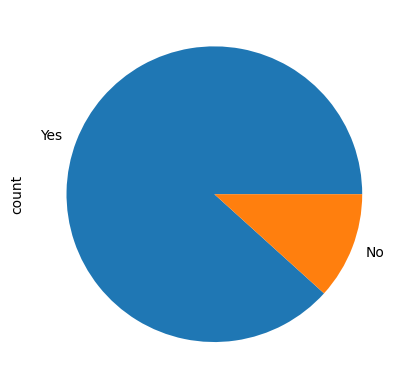

In [21]:
df['Churn'].value_counts().plot(kind='pie')

In [23]:
df.groupby('Churn')['MonthlyCharges'].mean()

,MonthlyCharges
Churn,
No,62.54641
Yes,75.96077


In [24]:
df.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [26]:
df.groupby('Churn')['Tenure'].mean()

,Tenure
Churn,
No,30.264957
Yes,17.476784


In [27]:
df.groupby('Churn')['Age'].mean()

,Age
Churn,
No,43.487179
Yes,44.831257


In [28]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [34]:
y=df[['Churn']]
x=df[['Age','Gender','Tenure','MonthlyCharges']]

In [35]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [36]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [38]:
x['Gender']= x['Gender'].apply(lambda x:1 if x=='Female' else 0)

/tmp/ipython-input-4034788747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender']= x['Gender'].apply(lambda x:1 if x=='Female' else 0)


In [39]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [40]:
y['Churn']=y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

/tmp/ipython-input-3201693273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn']=y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

In [44]:
X_train=scaler.fit_transform(X_train)

In [45]:
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [46]:
X_test= scaler.fit_transform(X_test)

In [47]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
  print('Accuracy Score',accuracy_score(y_test,predictions))

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_model=LogisticRegression()

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [52]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [54]:
y_pred=log_model.predict(X_test)

In [55]:
modelperformance(y_pred
                 )

Accuracy Score 0.885


In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
param_grid={'n_neighbors':[3,4,7,9],
            'weights':['uniform','distance'],
            }

In [59]:
from sklearn.model_selection import GridSearchCV
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [61]:
gridkn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 7, 9],
                         'weights': ['uniform', 'distance']})

In [62]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [63]:
y_pred=gridkn.predict(X_test)

In [64]:
modelperformance(y_pred)

Accuracy Score 0.88


In [65]:
from sklearn.svm import SVC

In [66]:
svm=SVC()

In [67]:
param_grid={
    'C':[0.01,0.1,0,5,1],
    'kernel':['linear','rbf','poly']

}

In [68]:
gridsvc=GridSearchCV(svm,param_grid,cv=5)

In [69]:
gridsvc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0, 5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [70]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [71]:
y_pred=gridsvc.predict(X_test)

In [72]:
modelperformance(y_pred)

Accuracy Score 0.885


In [73]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
param_grid={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5]

}

In [76]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [78]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [79]:
y_pred=grid_tree.predict(X_test)

In [80]:
modelperformance(y_pred)


Accuracy Score 0.845


In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [82]:
param_grid={
    'n_estimators':[100,200,300],
    'max_features':[2,3,4],
    'bootstrap':[True,False]
}

In [83]:
grid_rfc=GridSearchCV(rfc_model,param_grid,cv=5)

In [84]:
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [100, 200, 300]})

In [85]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 300}

In [86]:
y_pred=grid_rfc.predict(X_test)

In [87]:
modelperformance(y_pred)

Accuracy Score 0.87


In [88]:
best_model= gridsvc.best_estimator_

In [89]:
joblib.dump(best_model,'best_model.pkl')

['best_model.pkl']